In [3]:

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
#import missingno as msno
from scipy import stats

import numpy as np
import datetime
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import precision_score
from sklearn.metrics import precision_score

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score



# Import recall_score
from sklearn.metrics import recall_score

#from sklearn.metrics import roc_auc_curve
# Import roc_curve
from sklearn.metrics import roc_curve



from sklearn.svm import SVC

# Import confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
#import pydotplus



# Import train_test_split
from sklearn.model_selection import train_test_split

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression


from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation



import scipy.stats as st
#import pandas_profiling
import requests 
%matplotlib inline

# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#######################################################
from scipy.stats import spearmanr

from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score 

from xgboost import XGBClassifier
from sklearn import tree
#from sklearn.metrics import accuracy_score
#from sklearn.linear_model import accuracy_score

#from xgboost import XGBClassifier
#import xgboost as xgb


In [4]:
# Semester Start Date:
StartDate = '2018-09-17' 
StartDate = pd.to_datetime(StartDate)


In [5]:
# Semester End Date:
EndDate = '2019-01-21' 
EndDate = pd.to_datetime(EndDate)

In [6]:
TriOne = '2018-10-22'
TriOne = pd.to_datetime(TriOne)

In [7]:
TriTwo = '2018-11-26'
TriTwo = pd.to_datetime(TriTwo)

In [6]:
# Begin5 START OF MODULE FIVE #########################
#
# There are 3 files in Module 5 with 62 students.Module has attendance, quizzes.
# 33 students passed this module with 30 students failing.
# There are 6 assignments, attendance, quizzes and MCQ test in module 5.
#

In [8]:
# Data Preperation Module 5
# 2 files in Module5
# Module 5

module5ml = pd.read_csv('Module5_Moodle_Logs.csv')

In [9]:
module5mg = pd.read_csv('Module5_Moodle_Grades.csv')

In [10]:
print (module5mg.columns.tolist())
# Full list of Columns for module 5

['First name', 'Surname', 'ID number', 'Email address', 'Course total (Real)', 'Last downloaded from this course', 'Assignment: Assignment 1 image of poster (Real)', 'Assignment: Assignment 1  S  (Real)', 'Assignment: Assignment 1 T (Real)', 'Assignment: Assignment 2 - Submit (Real)', 'Assignment: FG (Real)', 'Assignment:   Task 1 (Real)', 'Assignment:   Task 2 (Real)', 'Assignment:   Task 3 (Real)', 'Assignment: Lab 1 S(Real)', 'Assignment: Pre-submission meeting (Real)', 'Assignment: Repeat assignment grading (Real)', 'Assignment: Submit repeat exam (Real)', 'Assignment: Upload Headshot (Real)', 'Assignment: v upload (Real)', 'Assignment 1 Non-Linear S total (Real)', 'Assignment 2 V total (Real)', 'Attendance: Attendance (Real)', 'MCQ Test total (Real)', 'Quiz: MCQ 2018 (Real)']


In [11]:
# Print the number of unique values in each modul5ml column
print(module5ml.nunique())

Time              5156
User full name      63
Affected user        1
Event context       82
Component           14
Event name          32
Description         73
Origin               2
IP address           1
dtype: int64


In [12]:
# Print the number of unique values in each modul5mg column
print(module5mg.nunique())

First name                                         63
Surname                                            63
ID number                                          63
Email address                                      63
Course total (Real)                                62
Last downloaded from this course                    2
Assignment: Assignment 1 image of poster (Real)     1
Assignment: Assignment 1  S  (Real)                 1
Assignment: Assignment 1 T (Real)                  13
Assignment: Assignment 2 - Submit (Real)           28
Assignment: FG (Real)                               2
Assignment:   Task 1 (Real)                         1
Assignment:   Task 2 (Real)                         1
Assignment:   Task 3 (Real)                         1
Assignment: Lab 1 S(Real)                           1
Assignment: Pre-submission meeting (Real)           2
Assignment: Repeat assignment grading (Real)        1
Assignment: Submit repeat exam (Real)               1
Assignment: Upload Headshot 

In [13]:
# time5
time5 = module5ml["Time"].str.split(",", n = 1, expand = True)

In [14]:
# making separate Date column from new data frame 
module5ml["Date"]= time5[0] 

# making seperate Time column from new data frame
module5ml['Time']= time5[1]


In [15]:
# Convert the date column to datetime64
module5ml.Date = pd.to_datetime(module5ml.Date)

In [16]:
len(module5ml)

14049

In [17]:
#Remove activity outside semester start and end dates range -Timeedit5
mask5 = (module5ml['Date'] >= StartDate) & (module5ml['Date'] <= EndDate)

module5ml = module5ml.loc[mask5]

len(module5ml)

9016

In [18]:
#Remove activity outside semester start and end dates range -Timeedit1
week5_5 = (module5ml['Date'] >= StartDate) & (module5ml['Date'] <= TriOne)

FirstFive5 = module5ml.loc[week5_5]

len(FirstFive5)


2284

In [19]:
#Remove activity outside semester start and end dates range -Timeedit1
week10_5 = (module5ml['Date'] >= TriOne) & (module5ml['Date'] <= TriTwo)

FirstTen5 = module5ml.loc[week10_5]

len(FirstTen5)


5333

In [20]:
#Remove activity outside semester start and end dates range -Timeedit1
week15_5 = (module5ml['Date'] >= TriTwo) & (module5ml['Date'] <= EndDate)

FirstFivt5 = module5ml.loc[week15_5]

len(FirstFivt5)


1529

In [21]:
module5ml.dtypes

Time                      object
User full name            object
Affected user             object
Event context             object
Component                 object
Event name                object
Description               object
Origin                    object
IP address                object
Date              datetime64[ns]
dtype: object

In [22]:
#Splituser5
# new data frame with split value columns 
new5 = module5ml["User full name"].str.split(" ", n = 1, expand = True)


In [23]:
# making separate first name column from new data frame 
module5ml["First name"]= new5[0] 

# making separate last name column from new data frame 
module5ml["Last name"]= new5[1] 


In [24]:
module5ml.head(2)

Time User full name Affected user                  Event context  \
3   14:26      aI1T bxjW             -  Assignment: Assignment 1    T   
4   14:26      aI1T bxjW             -               Course: Module 5   

    Component                                     Event name  \
3  Assignment  The status of the submission has been viewed.   
4      System                      Course user report viewed   

                                         Description Origin IP address  \
3  The user with id '0' has viewed the submission...    web  127.0.0.1   
4  The user with id '0' viewed the user report fo...    web  127.0.0.1   

        Date First name Last name  
3 2019-01-03       aI1T      bxjW  
4 2019-01-03       aI1T      bxjW

In [25]:
#m5ml_subset
m5ml_subset = module5ml.drop(module5ml[['IP address','Origin','Description','Affected user']], axis=1)

In [26]:
#onehot5
module5ml_onehot = m5ml_subset.copy()
module5ml_onehot = pd.get_dummies(module5ml_onehot, columns=['Event name'], prefix = ['Event name'])
module5ml_onehot = pd.get_dummies(module5ml_onehot, columns=['Event context'], prefix = ['Event context'])
module5ml_onehot = pd.get_dummies(module5ml_onehot, columns=['Component'], prefix = ['Component'])


print(module5ml_onehot.head())


      Time User full name       Date First name Last name  \
3    14:26      aI1T bxjW 2019-01-03       aI1T      bxjW   
4    14:26      aI1T bxjW 2019-01-03       aI1T      bxjW   
5    09:19      aA6B bBfk 2019-01-03       aA6B      bBfk   
6    09:17      aA6B bBfk 2019-01-03       aA6B      bBfk   
52   10:04      a3xG bp9L 2019-01-02       a3xG      bp9L   

    Event name_A file has been uploaded.  \
3                                      0   
4                                      0   
5                                      0   
6                                      0   
52                                     0   

    Event name_A submission has been submitted.  \
3                                             0   
4                                             0   
5                                             0   
6                                             0   
52                                            0   

    Event name_An online text has been uploaded.  \
3        

In [27]:
m5mg = module5mg[['First name', 'Surname', 'ID number', 'Course total (Real)','Assignment: Assignment 1 T (Real)', 'Assignment: Assignment 2 - Submit (Real)', 'Assignment: FG (Real)', 'Assignment: Pre-submission meeting (Real)', 'Assignment 1 Non-Linear S total (Real)', 'Assignment 2 V total (Real)', 'Attendance: Attendance (Real)', 'MCQ Test total (Real)', 'Quiz: MCQ 2018 (Real)']]

In [28]:
#Engaged = > 55
engaged5 = m5mg['Course total (Real)'] > 55


In [29]:
# Create a new column called df.engaged where the value is yes
# if df.age is greater than 55 and no if not
m5mg['engaged'] = np.where(m5mg['Course total (Real)']>=55, '1', '0')


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
m5mg['engaged'] = pd.to_numeric(m5mg['engaged'])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
print(m5mg['engaged'].value_counts(dropna=False))

0    39
1    24
Name: engaged, dtype: int64


In [32]:
print(m5mg['engaged'].value_counts(dropna=False))

0    39
1    24
Name: engaged, dtype: int64


In [33]:
# Print the number of unique values in each modul5mg column
print(m5mg.nunique())

First name                                   63
Surname                                      63
ID number                                    63
Course total (Real)                          62
Assignment: Assignment 1 T (Real)            13
Assignment: Assignment 2 - Submit (Real)     28
Assignment: FG (Real)                         2
Assignment: Pre-submission meeting (Real)     2
Assignment 1 Non-Linear S total (Real)       13
Assignment 2 V total (Real)                  28
Attendance: Attendance (Real)                39
MCQ Test total (Real)                        22
Quiz: MCQ 2018 (Real)                        22
engaged                                       2
dtype: int64


In [34]:
m5mg.dtypes

First name                                    object
Surname                                       object
ID number                                     object
Course total (Real)                          float64
Assignment: Assignment 1 T (Real)              int64
Assignment: Assignment 2 - Submit (Real)     float64
Assignment: FG (Real)                          int64
Assignment: Pre-submission meeting (Real)      int64
Assignment 1 Non-Linear S total (Real)       float64
Assignment 2 V total (Real)                  float64
Attendance: Attendance (Real)                float64
MCQ Test total (Real)                        float64
Quiz: MCQ 2018 (Real)                        float64
engaged                                        int64
dtype: object

In [35]:
m5mg.head(2)

First name Surname ID number  Course total (Real)  \
0       a8NM    bDqB  U8NMDqBG                82.78   
1       aSnR    bGk9  VSnRGk9O                10.14   

   Assignment: Assignment 1 T (Real)  \
0                                 50   
1                                  0   

   Assignment: Assignment 2 - Submit (Real)  Assignment: FG (Real)  \
0                                     61.43                    100   
1                                     58.57                      0   

   Assignment: Pre-submission meeting (Real)  \
0                                         10   
1                                          0   

   Assignment 1 Non-Linear S total (Real)  Assignment 2 V total (Real)  \
0                                    17.5                         21.5   
1                                     0.0                         20.5   

   Attendance: Attendance (Real)  MCQ Test total (Real)  \
0                           0.83                    0.0   
1                           0.68                   20.5   

   Quiz: MCQ 2018 (Real)  engaged  
0                   0.00        1  
1                  68.33        0

In [36]:
X5ss = m5mg.iloc[:,4:12]  #independent columns
y5ss = m5mg.iloc[:,-1]    #target column i.e engaged


In [37]:
X5ss.head()

Assignment: Assignment 1 T (Real)  \
0                                 50   
1                                  0   
2                                  0   
3                                  0   
4                                  0   

   Assignment: Assignment 2 - Submit (Real)  Assignment: FG (Real)  \
0                                     61.43                    100   
1                                     58.57                      0   
2                                      0.00                      0   
3                                      0.00                      0   
4                                      0.00                      0   

   Assignment: Pre-submission meeting (Real)  \
0                                         10   
1                                          0   
2                                          0   
3                                         10   
4                                         10   

   Assignment 1 Non-Linear S total (Real)  Assignment 2 V total (Real)  \
0                                    17.5                         21.5   
1                                     0.0                         20.5   
2                                     0.0                          0.0   
3                                     0.0                          0.0   
4                                     0.0                          0.0   

   Attendance: Attendance (Real)  MCQ Test total (Real)  
0                           0.83                    0.0  
1                           0.68                   20.5  
2                           0.61                   18.5  
3                           0.24                    0.0  
4                           0.26                    0.0

In [38]:
#apply SelectKBest class to extract top 8 best features
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X5ss,y5ss)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X5ss.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e


                                       Specs       Score
2                      Assignment: FG (Real)  638.677885
0          Assignment: Assignment 1 T (Real)  338.818564
1   Assignment: Assignment 2 - Submit (Real)  120.887867
4     Assignment 1 Non-Linear S total (Real)  118.586497
5                Assignment 2 V total (Real)   42.307235
3  Assignment: Pre-submission meeting (Real)   19.230769
7                      MCQ Test total (Real)    8.348814
6              Attendance: Attendance (Real)    1.728289


[0.13748036 0.10073327 0.18212578 0.04031544 0.13299176 0.10107131
 0.18337176 0.1219103 ]


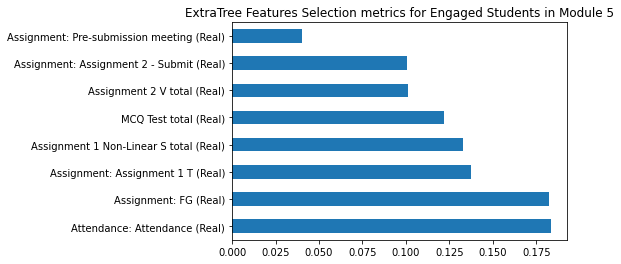

In [39]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X5ss,y5ss)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X5ss.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('ExtraTree Features Selection metrics for Engaged Students in Module 5')
plt.show()


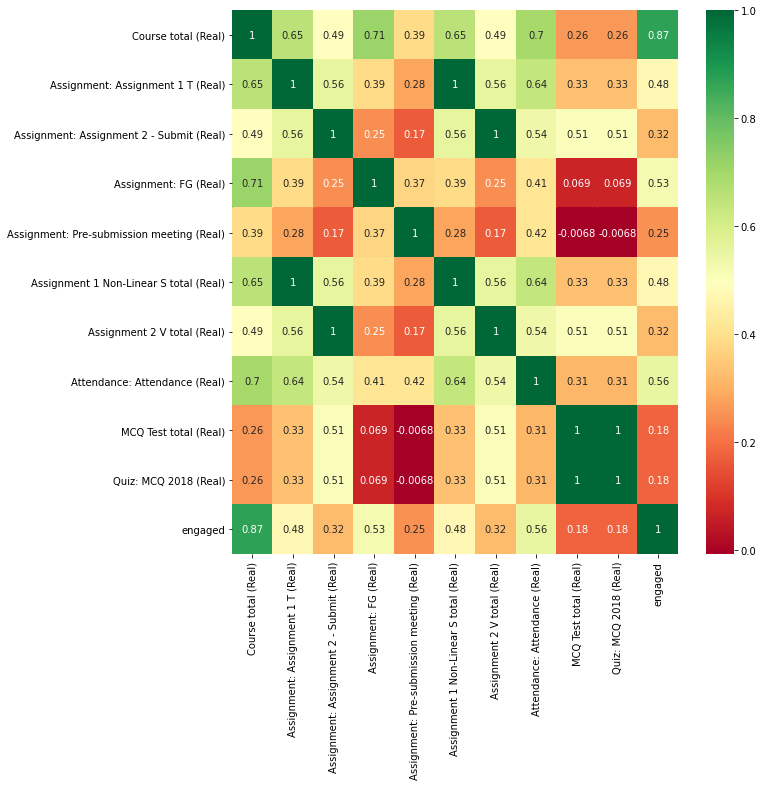

In [40]:
#get correlations of each features in dataset
corrmat = m5mg.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(m5mg[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [41]:
spear1 = m5mg['Attendance: Attendance (Real)']

In [42]:
spear2 = m5mg['engaged']

In [43]:
spearcorr = stats.spearmanr(spear1,spear2)
print(spearcorr)
# Would suggest a weak link 

SpearmanrResult(correlation=0.59896016877211, pvalue=2.15174623615045e-07)


In [44]:
spear3 = m5mg['Assignment: FG (Real)']

In [45]:
spearcorr = stats.spearmanr(spear3,spear2)
print(spearcorr)
# Would suggest a weak link 

SpearmanrResult(correlation=0.5269592363639692, pvalue=9.129403006680745e-06)


In [ ]:
#######~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [46]:
m5mg_subset = m5mg

In [47]:
merge_subset5 = pd.merge(module5ml_onehot,m5mg_subset[['First name','engaged']],on='First name', how='left')

In [48]:
merge_subset5.head(2)

Time User full name       Date First name Last name  \
0   14:26      aI1T bxjW 2019-01-03       aI1T      bxjW   
1   14:26      aI1T bxjW 2019-01-03       aI1T      bxjW   

   Event name_A file has been uploaded.  \
0                                     0   
1                                     0   

   Event name_A submission has been submitted.  \
0                                            0   
1                                            0   

   Event name_An online text has been uploaded.  \
0                                             0   
1                                             0   

   Event name_Badge listing viewed  Event name_Comment created  ...  \
0                                0                           0  ...   
1                                0                           0  ...   

   Component_Folder  Component_Forum  Component_Online text submissions  \
0                 0                0                                  0   
1                 0                0                                  0   

   Component_Overview report  Component_Page  Component_Submission comments  \
0                          0               0                              0   
1                          0               0                              0   

   Component_System  Component_URL  Component_User report  engaged  
0                 0              0                      0        0  
1                 1              0                      0        0  

[2 rows x 124 columns]

In [49]:
X5s = merge_subset5.iloc[:,5:123]  #independent columns
y5s = merge_subset5.iloc[:,-1]    #target column i.e engaged


In [50]:
X5s.head(2)

Event name_A file has been uploaded.  \
0                                     0   
1                                     0   

   Event name_A submission has been submitted.  \
0                                            0   
1                                            0   

   Event name_An online text has been uploaded.  \
0                                             0   
1                                             0   

   Event name_Badge listing viewed  Event name_Comment created  \
0                                0                           0   
1                                0                           0   

   Event name_Comment deleted  Event name_Course module instance list viewed  \
0                           0                                              0   
1                           0                                              0   

   Event name_Course module viewed  Event name_Course searched  \
0                                0                           0   
1                                0                           0   

   Event name_Course user report viewed  ...  Component_File submissions  \
0                                     0  ...                           0   
1                                     1  ...                           0   

   Component_Folder  Component_Forum  Component_Online text submissions  \
0                 0                0                                  0   
1                 0                0                                  0   

   Component_Overview report  Component_Page  Component_Submission comments  \
0                          0               0                              0   
1                          0               0                              0   

   Component_System  Component_URL  Component_User report  
0                 0              0                      0  
1                 1              0                      0  

[2 rows x 118 columns]

In [51]:
y5s.head(2)

0    0
1    0
Name: engaged, dtype: int64

In [52]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X5s,y5s)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X5s.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e


                                           Specs      Score
36            Event context_Assignment: v upload  38.101034
110                              Component_Forum  15.486591
83               Event context_Forum: News forum  12.625766
26   Event context_Assignment: Assignment 1    T  11.729773
22                   Event name_User list viewed   9.854485
7                Event name_Course module viewed   9.600609
11                  Event name_Discussion viewed   8.272923
13           Event name_Grade user report viewed   7.841655
117                        Component_User report   7.841655
108                   Component_File submissions   7.810321


[5.98029044e-03 8.38961214e-03 1.10051404e-03 5.02620436e-03
 3.62444249e-03 1.03180457e-03 1.26909723e-02 2.31906923e-02
 1.37729302e-03 4.85827918e-04 7.25875266e-03 1.40511285e-02
 1.51838522e-03 1.45489987e-02 1.12286515e-03 1.78705052e-03
 6.93932889e-03 1.30187366e-02 1.48588369e-02 1.97497979e-02
 1.78222591e-02 1.58026981e-03 3.57896197e-02 7.38403919e-03
 5.28875262e-04 6.02102634e-03 5.59423479e-02 6.77008023e-03
 5.42874110e-03 1.23956183e-02 9.27110099e-03 3.84857774e-03
 3.31896051e-02 9.52672754e-03 9.48647639e-03 1.49998586e-02
 1.22552364e-01 1.21233443e-02 3.41558667e-04 8.74309259e-03
 6.01348684e-04 4.06642390e-03 1.54376219e-03 3.03410136e-03
 3.06365671e-04 1.62165587e-02 1.33266315e-03 6.88917111e-03
 7.19473067e-03 5.30217703e-03 3.22476433e-04 5.93318585e-03
 5.73013680e-03 1.29642903e-02 2.00427650e-04 9.23554060e-04
 9.73674493e-04 6.22771444e-03 9.63646709e-03 1.34573916e-03
 2.92920821e-02 4.21676352e-03 5.69962276e-03 5.48720794e-03
 5.66116600e-03 1.023585

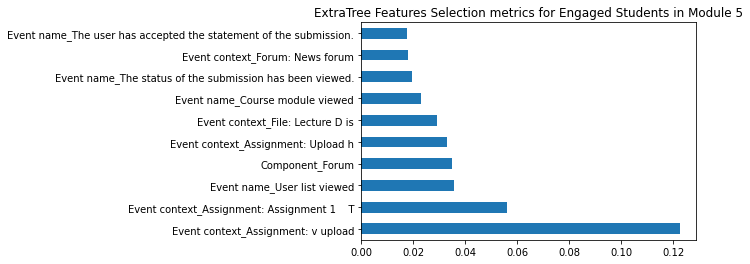

In [53]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X5s,y5s)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X5s.columns)
plt.title('ExtraTree Features Selection metrics for Engaged Students in Module 5')
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


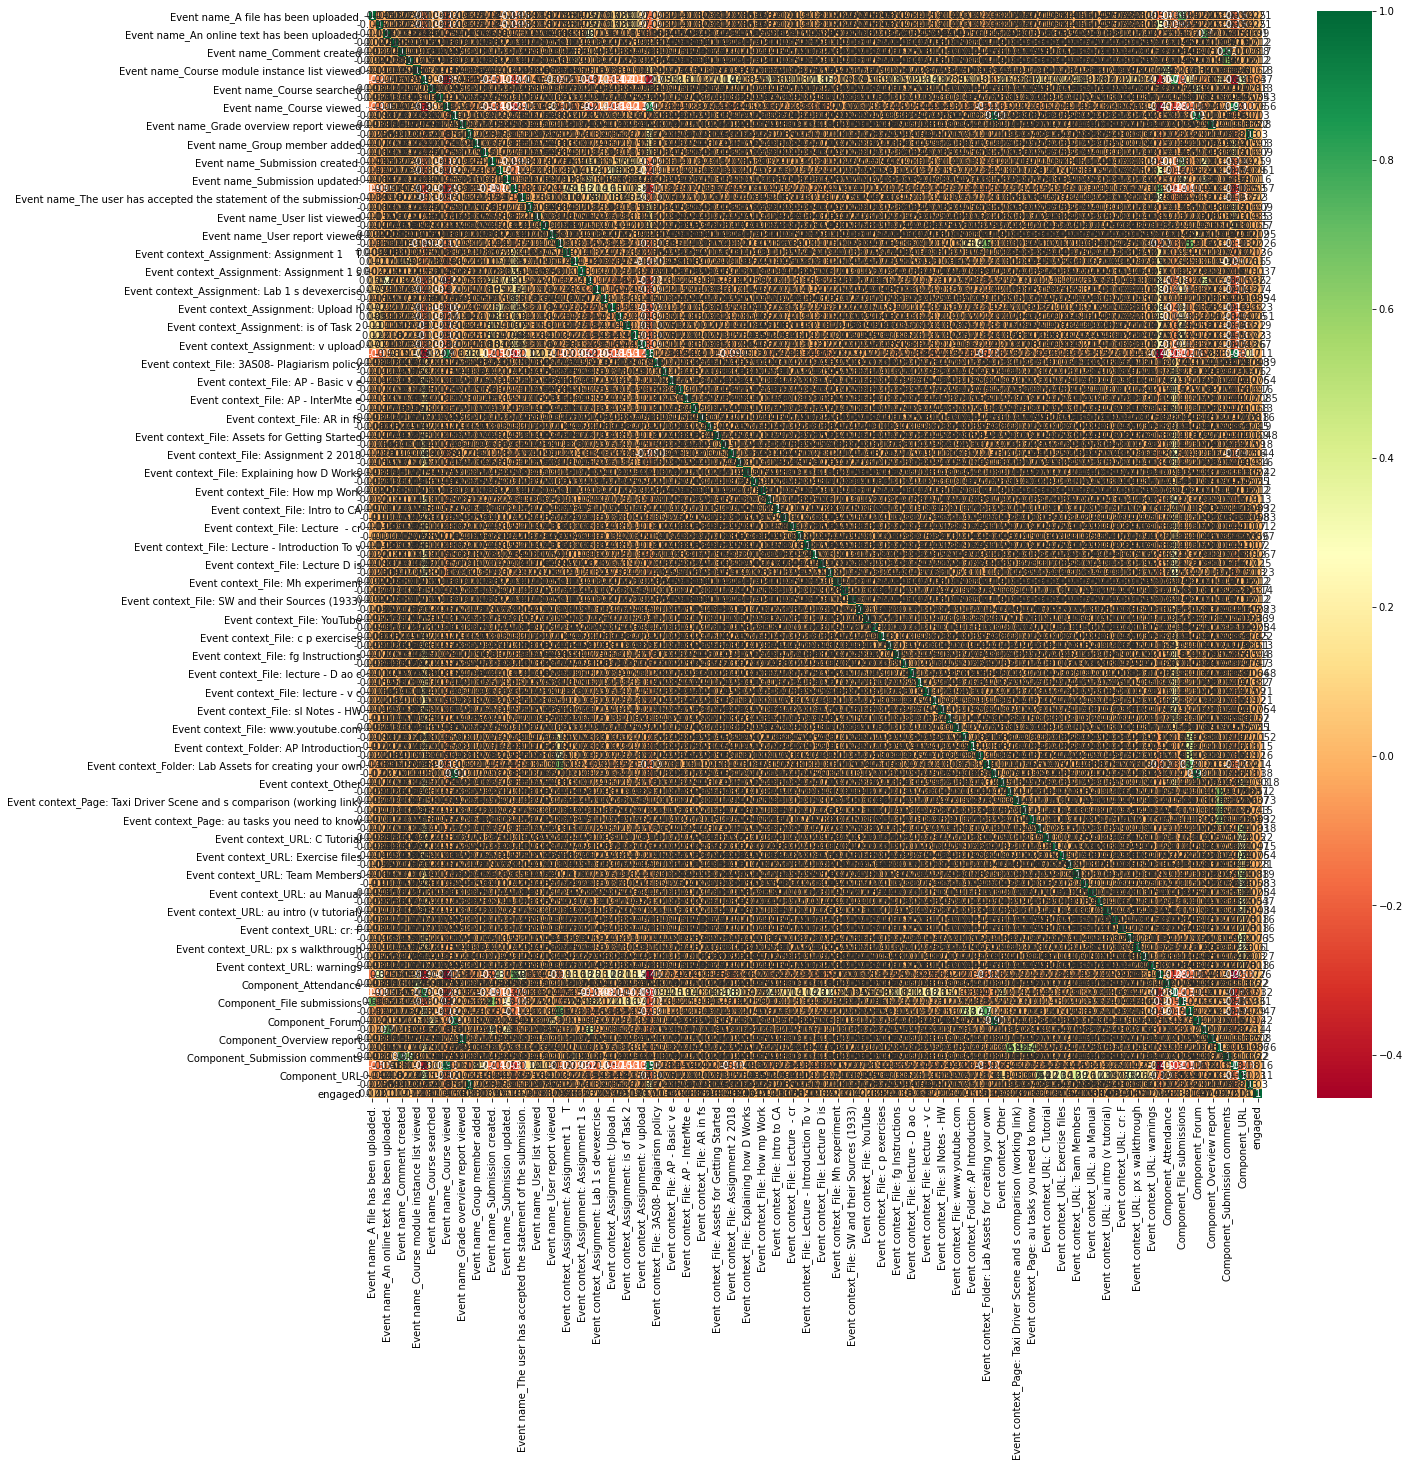

In [54]:
#get correlations of each features in dataset
corrmat = merge_subset5.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(merge_subset5[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [55]:
featselect5 = X5s[['Event context_Assignment: v upload','Component_Forum','Event context_Forum: News forum','Event context_Assignment: Assignment 1    T','Event name_User list viewed','Event name_Course module viewed','Event name_Discussion viewed','Event name_Grade user report viewed','Component_User report','Component_File submissions']]

In [41]:
#                                           Specs      Score
#36            Event context_Assignment: v upload  38.101034
#110                              Component_Forum  15.486591
#83               Event context_Forum: News forum  12.625766
#26   Event context_Assignment: Assignment 1    T  11.729773
#22                   Event name_User list viewed   9.854485
#7                Event name_Course module viewed   9.600609
#11                  Event name_Discussion viewed   8.272923
#13           Event name_Grade user report viewed   7.841655
#117                        Component_User report   7.841655
#108                   Component_File submissions   7.810321

In [56]:
X5s.columns

Index(['Event name_A file has been uploaded.',
       'Event name_A submission has been submitted.',
       'Event name_An online text has been uploaded.',
       'Event name_Badge listing viewed', 'Event name_Comment created',
       'Event name_Comment deleted',
       'Event name_Course module instance list viewed',
       'Event name_Course module viewed', 'Event name_Course searched',
       'Event name_Course user report viewed',
       ...
       'Component_File submissions', 'Component_Folder', 'Component_Forum',
       'Component_Online text submissions', 'Component_Overview report',
       'Component_Page', 'Component_Submission comments', 'Component_System',
       'Component_URL', 'Component_User report'],
      dtype='object', length=118)

In [57]:
Xfs5 = featselect5 # Features
yfs5 = y5s # Target variable


In [58]:
# Split dataset into training set and test set
Xfs5_train, Xfs5_test, yfs5_train, yfs5_test = train_test_split(Xfs5, yfs5, test_size=0.3, random_state=1) # 70% training and 30% test


In [64]:
# Create Decision Tree classifer object
dtclffs5 = DecisionTreeClassifier(max_depth =9)

# Train Decision Tree Classifer
dtclffs5 = dtclffs5.fit(Xfs5_train,yfs5_train)

#Predict the response for test dataset
yfs5_pred = dtclffs5.predict(Xfs5_test)


In [65]:
cvscores_10dt = cross_val_score(dtclffs5, Xfs5_train, yfs5_train, cv = 10)
print(np.mean(cvscores_10dt))

0.5685317157816606


In [66]:
# Instantiate the classifier
rfclffs5 = RandomForestClassifier(n_estimators=20)

# Fit to the training data
rfclffs5.fit(Xfs5_train, yfs5_train)

# Compute accuracy
print(rfclffs5.score(Xfs5_test, yfs5_test))


0.5519408502772644


In [67]:
cvscores_10rf = cross_val_score(rfclffs5, Xfs5_train, yfs5_train, cv = 10)
print(np.mean(cvscores_10rf))

0.5683732371762724


In [68]:
from sklearn.svm import SVC

svcfs5 = SVC(kernel='linear',C=0.1)

#Train it, or "fit it", to the data:
svcfs5.fit(Xfs5_train, yfs5_train)

# Compute accuracy
print(svcfs5.score(Xfs5_test, yfs5_test))


0.5519408502772644


In [69]:
cvscores_10svc = cross_val_score(svcfs5, Xfs5_train, yfs5_train, cv = 10)
print(np.mean(cvscores_10svc))

0.5685317157816606


In [70]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logregfs5 = LogisticRegression()

# fit the model with data
logregfs5.fit(Xfs5_train,yfs5_train)

#
ylg5_pred=logregfs5.predict(Xfs5_test)


In [71]:
cvscores_10 = cross_val_score(logregfs5, Xfs5_train, yfs5_train, cv = 10)
print(np.mean(cvscores_10))

0.5685317157816606


In [72]:
# import the metrics class
from sklearn import metrics
cnflr5_matrix = metrics.confusion_matrix(yfs5_test, ylg5_pred)
cnflr5_matrix


array([[1392,   77],
       [1135,  101]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

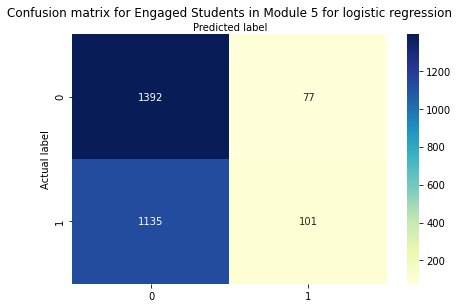

In [73]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnflr5_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Engaged Students in Module 5 for logistic regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


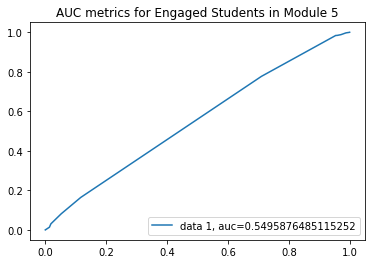

In [74]:
ylg5_pred_proba = logregfs5.predict_proba(Xfs5_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(yfs5_test,  ylg5_pred_proba)
auc = metrics.roc_auc_score(yfs5_test, ylg5_pred_proba)
plt.title('AUC metrics for Engaged Students in Module 5')

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# AUC score for the case is 0.54. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.
#


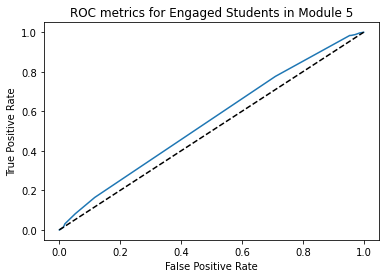

In [75]:
# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(yfs5_test, ylg5_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.title('ROC metrics for Engaged Students in Module 5')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()


In [76]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yfs5_test, yfs5_pred))


Accuracy: 0.5519408502772644


In [77]:
# Import precision_score
from sklearn.metrics import precision_score

# Print the precision
print(precision_score(yfs5_test, yfs5_pred))


0.5674157303370787


In [78]:
# Import recall_score
from sklearn.metrics import recall_score

# Print the recall
print(recall_score(yfs5_test, yfs5_pred))


0.08171521035598706


In [60]:
print("Accuracy:",metrics.accuracy_score(yfs5_test, yfs5_pred))
print("Precision:",metrics.precision_score(yfs5_test, yfs5_pred))
print("Recall:",metrics.recall_score(yfs5_test, yfs5_pred))
print("F1 Score",metrics.f1_score(yfs5_test, yfs5_pred))


Accuracy: 0.551940850277
Precision: 0.567415730337
Recall: 0.081715210356
F1 Score 0.142857142857


In [61]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(yfs5_test, yfs5_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(yfs5_test, yfs5_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yfs5_test, yfs5_pred)))

Mean Absolute Error: 0.448059149723
Mean Squared Error: 0.448059149723
Root Mean Squared Error: 0.669372205669


In [79]:
# Generate the confusion matrix and classification report
print(confusion_matrix(yfs5_test, yfs5_pred))
print(classification_report(yfs5_test, yfs5_pred))


[[1392   77]
 [1135  101]]
              precision    recall  f1-score   support

           0       0.55      0.95      0.70      1469
           1       0.57      0.08      0.14      1236

    accuracy                           0.55      2705
   macro avg       0.56      0.51      0.42      2705
weighted avg       0.56      0.55      0.44      2705



In [ ]:
#````

In [80]:
# Instantiate bootstrap aggregation model
bagged_model = BaggingClassifier(n_estimators=50, random_state=123)

# Fit
bagged_model.fit(Xfs5_train, yfs5_train)

# Predict
bagged_pred = bagged_model.predict(Xfs5_test)

#print(logregfs1.score(Xfs_train, yfs_train))

# Print accuracy score
print(accuracy_score(yfs5_test, bagged_pred))


0.5519408502772644


In [81]:
# Boosting model
boosted_model = AdaBoostClassifier(n_estimators=50, random_state=123)

# Fit
boosted_model_fit = boosted_model.fit(Xfs5_train, yfs5_train)

# Predict
boosted_pred = boosted_model_fit.predict(Xfs5_test)

# Print model accuracy
print(accuracy_score(yfs5_test, boosted_pred))


0.5519408502772644


In [82]:
import xgboost as xgb

In [83]:
# Instantiate
xgb = XGBClassifier(random_state=123, learning_rate=0.1, n_estimators=10, max_depth=3)

# Fit
xgb = xgb.fit(Xfs5_train, yfs5_train)

# Predict
xgb_pred = xgb.predict(Xfs5_test)

# Print accuracy score
print('Final prediction score: [%.8f]' % accuracy_score(yfs5_test, xgb_pred))


Final prediction score: [0.55194085]


In [ ]:
#````

In [ ]:
#Trimester 1

In [84]:
FirstFive5.head(2)

Time User full name Affected user                     Event context  \
1737   23:36      aTka b80f             -                  Course: Module 5   
1738   23:20      a3xG bp9L             -  File: Assets for Getting Started   

     Component            Event name  \
1737    System         Course viewed   
1738      File  Course module viewed   

                                            Description Origin IP address  \
1737  The user with id '0' viewed the course with id...    web  127.0.0.1   
1738  The user with id '0' viewed the 'resource' act...    web  127.0.0.1   

           Date  
1737 2018-10-12  
1738 2018-10-12

In [85]:
FirstFive5= FirstFive5.drop(FirstFive5[['IP address','Origin','Description','Affected user']], axis=1)


In [86]:
FirstFive5.head(2)

Time User full name                     Event context Component  \
1737   23:36      aTka b80f                  Course: Module 5    System   
1738   23:20      a3xG bp9L  File: Assets for Getting Started      File   

                Event name       Date  
1737         Course viewed 2018-10-12  
1738  Course module viewed 2018-10-12

In [87]:
FirstFive5_onehot = FirstFive5.copy()
FirstFive5_onehot = pd.get_dummies(FirstFive5_onehot, columns=['Event name'], prefix = ['Event name'])
FirstFive5_onehot = pd.get_dummies(FirstFive5_onehot, columns=['Event context'], prefix = ['Event context'])
FirstFive5_onehot = pd.get_dummies(FirstFive5_onehot, columns=['Component'], prefix = ['Component'])


print(FirstFive5_onehot.head())

###
#
# One-Hot encoding
# The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column.
# This has the benefit of not weighting a value improperly.
# https://www.datacamp.com/community/tutorials/categorical-data



        Time User full name       Date  Event name_A file has been uploaded.  \
1737   23:36      aTka b80f 2018-10-12                                     0   
1738   23:20      a3xG bp9L 2018-10-12                                     0   
1739   23:19      a3xG bp9L 2018-10-12                                     0   
1740   23:19      a3xG bp9L 2018-10-12                                     0   
1741   23:08      aTka b80f 2018-10-12                                     0   

      Event name_A submission has been submitted.  \
1737                                            0   
1738                                            0   
1739                                            0   
1740                                            0   
1741                                            0   

      Event name_An online text has been uploaded.  \
1737                                             0   
1738                                             0   
1739                                  

In [88]:
FirstFive5_onehot.head(2)

Time User full name       Date  Event name_A file has been uploaded.  \
1737   23:36      aTka b80f 2018-10-12                                     0   
1738   23:20      a3xG bp9L 2018-10-12                                     0   

      Event name_A submission has been submitted.  \
1737                                            0   
1738                                            0   

      Event name_An online text has been uploaded.  \
1737                                             0   
1738                                             0   

      Event name_Course module instance list viewed  \
1737                                              0   
1738                                              0   

      Event name_Course module viewed  Event name_Course searched  \
1737                                0                           0   
1738                                1                           0   

      Event name_Course viewed  ...  Component_Assignment  Component_File  \
1737                         1  ...                     0               0   
1738                         0  ...                     0               1   

      Component_File submissions  Component_Folder  Component_Forum  \
1737                           0                 0                0   
1738                           0                 0                0   

      Component_Online text submissions  Component_Page  Component_System  \
1737                                  0               0                 1   
1738                                  0               0                 0   

      Component_URL  Component_User report  
1737              0                      0  
1738              0                      0  

[2 rows x 91 columns]

In [89]:
# new data frame with split value columns 
new5a = FirstFive5_onehot["User full name"].str.split(" ", n = 1, expand = True)


In [90]:
# making separate first name column from new data frame 
FirstFive5_onehot["First name"]= new5a[0] 

# making separate last name column from new data frame 
FirstFive5_onehot["Last name"]= new5a[1] 


In [91]:
# Merge subset
merge_subset5_tri = pd.merge(FirstFive5_onehot,m5mg_subset[['First name','engaged']],on='First name', how='left')

In [140]:
#merge_subset5_tri = pd.merge(module5ml_onehot,m5mg_subset[['First name','engaged']],on='First name', how='left')

In [92]:
merge_subset5_tri.head(2)

Time User full name       Date  Event name_A file has been uploaded.  \
0   23:36      aTka b80f 2018-10-12                                     0   
1   23:20      a3xG bp9L 2018-10-12                                     0   

   Event name_A submission has been submitted.  \
0                                            0   
1                                            0   

   Event name_An online text has been uploaded.  \
0                                             0   
1                                             0   

   Event name_Course module instance list viewed  \
0                                              0   
1                                              0   

   Event name_Course module viewed  Event name_Course searched  \
0                                0                           0   
1                                1                           0   

   Event name_Course viewed  ...  Component_Folder  Component_Forum  \
0                         1  ...                 0                0   
1                         0  ...                 0                0   

   Component_Online text submissions  Component_Page  Component_System  \
0                                  0               0                 1   
1                                  0               0                 0   

   Component_URL  Component_User report  First name  Last name  engaged  
0              0                      0        aTka       b80f        0  
1              0                      0        a3xG       bp9L        0  

[2 rows x 94 columns]

In [93]:
X55s = merge_subset5_tri.iloc[:,3:91]  #independent columns
y55s = merge_subset5_tri.iloc[:,-1]    #target column i.e engaged


In [94]:
X55s.head(2)

Event name_A file has been uploaded.  \
0                                     0   
1                                     0   

   Event name_A submission has been submitted.  \
0                                            0   
1                                            0   

   Event name_An online text has been uploaded.  \
0                                             0   
1                                             0   

   Event name_Course module instance list viewed  \
0                                              0   
1                                              0   

   Event name_Course module viewed  Event name_Course searched  \
0                                0                           0   
1                                1                           0   

   Event name_Course viewed  Event name_Discussion viewed  \
0                         1                             0   
1                         0                             0   

   Event name_Grade user report viewed  Event name_Group member added  ...  \
0                                    0                              0  ...   
1                                    0                              0  ...   

   Component_Assignment  Component_File  Component_File submissions  \
0                     0               0                           0   
1                     0               1                           0   

   Component_Folder  Component_Forum  Component_Online text submissions  \
0                 0                0                                  0   
1                 0                0                                  0   

   Component_Page  Component_System  Component_URL  Component_User report  
0               0                 1              0                      0  
1               0                 0              0                      0  

[2 rows x 88 columns]

In [95]:
y55s.head(2)

0    0
1    0
Name: engaged, dtype: int64

In [96]:

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X55s,y55s)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X55s.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36


                                                Specs     Score
21  Event context_Assignment: Assignment 1 i of po...  9.382588
36           Event context_File: Additional Resources  8.394659
49                      Event context_File: Lecture h  8.007055
73                     Event context_URL: au download  7.032445
27             Event context_Assignment: is of Task 3  6.166537
48                   Event context_File: Lecture D is  6.001101
23    Event context_Assignment: Assignment 2 - Submit  4.181494
45                    Event context_File: Lecture  ao  2.817910
3       Event name_Course module instance list viewed  2.742362
13                     Event name_Submission updated.  2.189184


[0.00278922 0.00642517 0.00052208 0.0214138  0.0022688  0.00442546
 0.00114875 0.00059904 0.00316055 0.00104836 0.00037658 0.00215367
 0.02892198 0.01634639 0.02440191 0.00885685 0.00026731 0.01166693
 0.00149919 0.00445403 0.00091222 0.09331543 0.00319424 0.03407389
 0.01324074 0.01166361 0.00182285 0.05556254 0.0187896  0.00446334
 0.01861631 0.00551804 0.00894032 0.00907399 0.00121609 0.00143229
 0.08213818 0.0057035  0.00171631 0.00065742 0.0054153  0.01210918
 0.01263047 0.00116261 0.00519015 0.02564471 0.00977338 0.0016725
 0.05883733 0.07804361 0.0057801  0.01223759 0.01210464 0.01031044
 0.0065053  0.00553701 0.01429776 0.00119897 0.01399638 0.00024539
 0.01193798 0.00087636 0.0005292  0.00276336 0.002611   0.00059947
 0.00027956 0.00273627 0.00204693 0.00147754 0.01370125 0.01951124
 0.00630019 0.0661201  0.01267513 0.00627042 0.00106122 0.00084121
 0.00747334 0.01057141 0.00476933 0.00231598 0.00336018 0.00074701
 0.00222922 0.00288462 0.00161744 0.00420325]


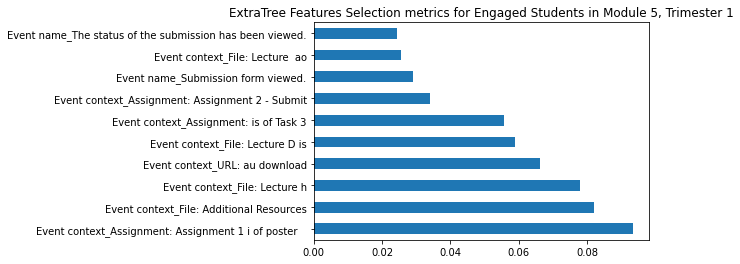

In [97]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X55s,y55s)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X55s.columns)
plt.title('ExtraTree Features Selection metrics for Engaged Students in Module 5, Trimester 1')
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


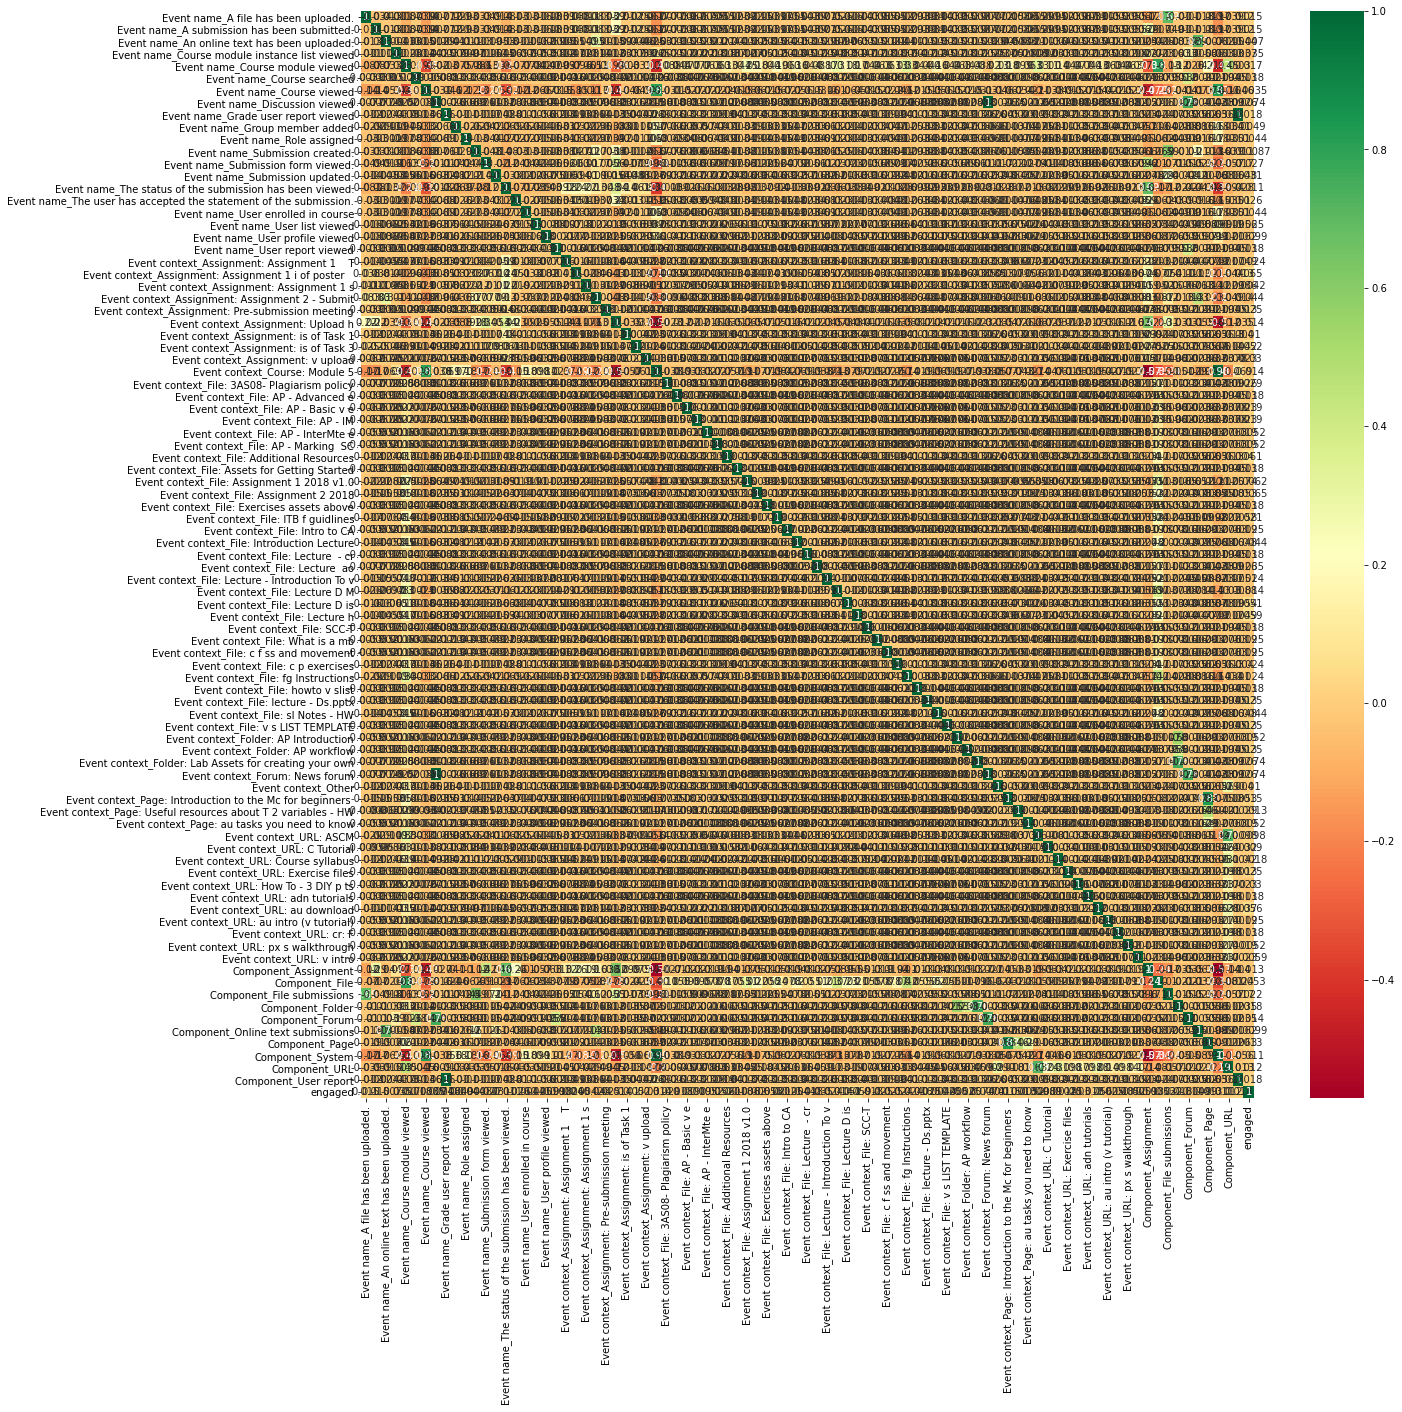

In [98]:
#get correlations of each features in dataset
corrmat = merge_subset5_tri.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(merge_subset5_tri[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [99]:
X55s.columns

Index(['Event name_A file has been uploaded.',
       'Event name_A submission has been submitted.',
       'Event name_An online text has been uploaded.',
       'Event name_Course module instance list viewed',
       'Event name_Course module viewed', 'Event name_Course searched',
       'Event name_Course viewed', 'Event name_Discussion viewed',
       'Event name_Grade user report viewed', 'Event name_Group member added',
       'Event name_Role assigned', 'Event name_Submission created.',
       'Event name_Submission form viewed.', 'Event name_Submission updated.',
       'Event name_The status of the submission has been viewed.',
       'Event name_The user has accepted the statement of the submission.',
       'Event name_User enrolled in course', 'Event name_User list viewed',
       'Event name_User profile viewed', 'Event name_User report viewed',
       'Event context_Assignment: Assignment 1    T',
       'Event context_Assignment: Assignment 1 i of poster   ',
       'Eve

In [ ]:
#21  Event context_Assignment: Assignment 1 i of po...  9.382588
#36           Event context_File: Additional Resources  8.394659
#49                      Event context_File: Lecture h  8.007055
#73                     Event context_URL: au download  7.032445
#27             Event context_Assignment: is of Task 3  6.166537
#48                   Event context_File: Lecture D is  6.001101
#23    Event context_Assignment: Assignment 2 - Submit  4.181494
#45                    Event context_File: Lecture  ao  2.817910
#3       Event name_Course module instance list viewed  2.742362
#13                     Event name_Submission updated.  2.189184

In [100]:
feattime55 = X55s[['Event context_Assignment: Assignment 1 i of poster   ','Event context_File: Additional Resources','Event context_File: Lecture h','Event context_URL: au download','Event context_Assignment: is of Task 3','Event context_File: Lecture D is','Event context_Assignment: Assignment 2 - Submit','Event context_File: Lecture  ao','Event name_Course module instance list viewed','Event name_Submission updated.']]

In [101]:
Xt5a = feattime55 # Features
yt5a = y55s # Target variable

In [102]:
# Create training and testing sets
Xt5a_train, Xt5a_test, yt5a_train, yt5a_test = train_test_split(Xt5a, yt5a, test_size=0.3)


In [103]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logregt5a = LogisticRegression()

# fit the model with data
logregt5a.fit(Xt5a_train,yt5a_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [104]:
yt5a_pred=logregt5a.predict(Xt5a_test)

In [105]:
# Perform 10-fold CV
cvscores_10 = cross_val_score(logregt5a, Xt5a_train, yt5a_train, cv = 10)
print(np.mean(cvscores_10))

0.6076454402515723


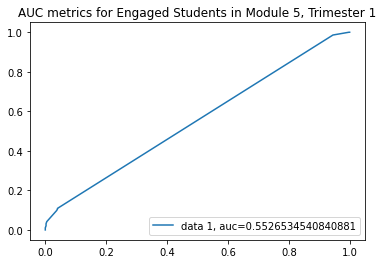

In [106]:
ylg5a_pred_proba = logregt5a.predict_proba(Xt5a_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(yt5a_test,  ylg5a_pred_proba)
auc = metrics.roc_auc_score(yt5a_test, ylg5a_pred_proba)
plt.title('AUC metrics for Engaged Students in Module 5, Trimester 1')
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# AUC score for the case is 0.54. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.
#


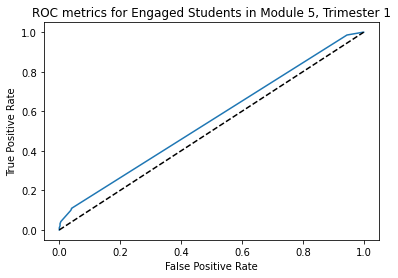

In [107]:
# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(yt5a_test, ylg5a_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.title('ROC metrics for Engaged Students in Module 5, Trimester 1')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()


In [108]:
# Perform 10-fold CV
cvscores_5a = cross_val_score(logregt5a, Xt5a_train, yt5a_train, cv = 10)
print(np.mean(cvscores_5a))

0.6076454402515723


In [109]:
print("Accuracy:",metrics.accuracy_score(yt5a_test, yt5a_pred))
print("Precision:",metrics.precision_score(yt5a_test, yt5a_pred))
print("Recall:",metrics.recall_score(yt5a_test, yt5a_pred))
print("F1 Score",metrics.f1_score(yt5a_test, yt5a_pred))


Accuracy: 0.6034985422740525
Precision: 0.6511627906976745
Recall: 0.09824561403508772
F1 Score 0.17073170731707318


In [110]:
# Instantiate the classifier
rfclffs5a = RandomForestClassifier(n_estimators =10)

# Fit to the training data
rfclffs5a.fit(Xt5a_train, yt5a_train)

# Compute accuracy
print(rfclffs5a.score(Xt5a_test, yt5a_test))


0.6034985422740525


In [111]:
# Perform 10-fold CV
cvscores_10rf = cross_val_score(rfclffs5a, Xt5a_train, yt5a_train, cv = 10)
print(np.mean(cvscores_10rf))

0.605129716981132


In [112]:
from sklearn.svm import SVC

svcfs5a = SVC(kernel='linear',C=0.1)

#Train it, or "fit it", to the data:
svcfs5a.fit(Xt5a_train, yt5a_train)

# Compute accuracy
print(svcfs5a.score(Xt5a_test, yt5a_test))


0.5889212827988338


In [113]:
# Perform 10-fold CV
cvscores_10svc = cross_val_score(svcfs5a, Xt5a_train, yt5a_train, cv = 10)
print(np.mean(cvscores_10svc))

0.5819811320754716


In [123]:
# Create Decision Tree classifer object
dtclffs5a = DecisionTreeClassifier(max_depth = 9)

# Train Decision Tree Classifer
dtclffs5a = dtclffs5a.fit(Xt5a_train,yt5a_train)

#Predict the response for test dataset
yfs5a_pred = dtclffs5a.predict(Xt5a_test)


In [124]:
# Compute accuracy
print(dtclffs5a.score(Xt5a_test, yt5a_test))

0.6034985422740525


In [125]:
# Perform 10-fold CV
cvscores_10dt5a = cross_val_score(dtclffs5a, Xt5a_train, yt5a_train, cv = 10)
print(np.mean(cvscores_10dt5a))

0.6088993710691823


In [126]:
# Generate the confusion matrix and classification report
print(confusion_matrix(yt5a_test, yt5a_pred))
print(classification_report(yt5a_test, yt5a_pred))


[[386  15]
 [257  28]]
              precision    recall  f1-score   support

           0       0.60      0.96      0.74       401
           1       0.65      0.10      0.17       285

    accuracy                           0.60       686
   macro avg       0.63      0.53      0.46       686
weighted avg       0.62      0.60      0.50       686



In [ ]:
#````

In [127]:
# Instantiate bootstrap aggregation model
bagged_model = BaggingClassifier(n_estimators=50, random_state=123)

# Fit
bagged_model.fit(Xt5a_train, yt5a_train)

# Predict
bagged_pred = bagged_model.predict(Xt5a_test)

#print(logregfs1.score(Xfs_train, yfs_train))

# Print accuracy score
print(accuracy_score(yt5a_test, bagged_pred))


0.6049562682215743


In [128]:
# Boosting model
boosted_model = AdaBoostClassifier(n_estimators=50, random_state=123)

# Fit
boosted_model_fit = boosted_model.fit(Xt5a_train, yt5a_train)

# Predict
boosted_pred = boosted_model_fit.predict(Xt5a_test)

# Print model accuracy
print(accuracy_score(yt5a_test, boosted_pred))


0.6034985422740525


In [129]:
import xgboost as xgb

In [130]:
# Instantiate
xgb = XGBClassifier(random_state=123, learning_rate=0.1, n_estimators=10, max_depth=3)

# Fit
xgb = xgb.fit(Xt5a_train, yt5a_train)

# Predict
xgb_pred = xgb.predict(Xt5a_test)

# Print accuracy score
print('Final prediction score: [%.8f]' % accuracy_score(yt5a_test, xgb_pred))


Final prediction score: [0.60349854]


In [ ]:
#````

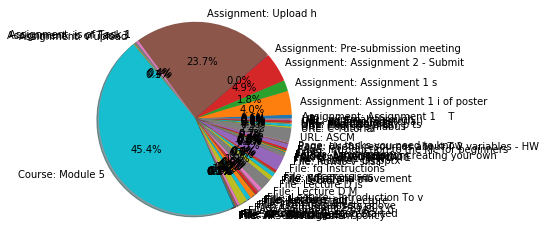

In [56]:
labels = FirstFive5['Event context'].astype('category').cat.categories.tolist()
counts = FirstFive5['Event context'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

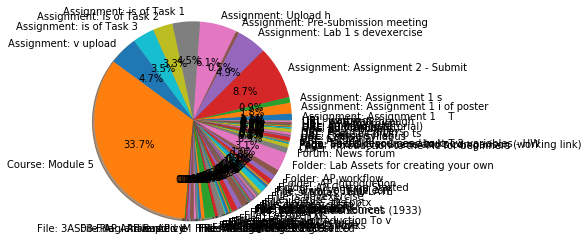

In [57]:
labels = m5ml_subset['Event context'].astype('category').cat.categories.tolist()
counts = m5ml_subset['Event context'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [58]:
m5ml_subset["Event context"].value_counts()


Course: Module 5                                           3037
Assignment: Assignment 2 - Submit                           782
Assignment: Upload h                                        546
Assignment: Lab 1 s devexercise                             439
Assignment: v upload                                        426
Assignment: is of Task 1                                    405
Assignment: is of Task 3                                    319
Assignment: is of Task 2                                    295
Folder: Lab Assets for creating your own                    276
Assignment: Assignment 1 i of poster                        159
File: Assignment 2 2018                                     153
File: Lecture h                                             107
Assignment: Assignment 1    T                                98
File: s devexercise                                          90
Folder: AP workflow                                          90
File: Lecture D M                       

In [59]:
m5ml_subset["Event name"].value_counts()


Course viewed                                             2622
Course module viewed                                      2060
The status of the submission has been viewed.             1496
Submission form viewed.                                    511
A file has been uploaded.                                  388
A submission has been submitted.                           388
Submission created.                                        384
The user has accepted the statement of the submission.     300
Zip archive of folder downloaded                           250
Grade user report viewed                                   124
Discussion viewed                                           69
Submission updated.                                         67
An online text has been uploaded.                           63
Role assigned                                               61
User enrolled in course                                     61
Group member added                                     

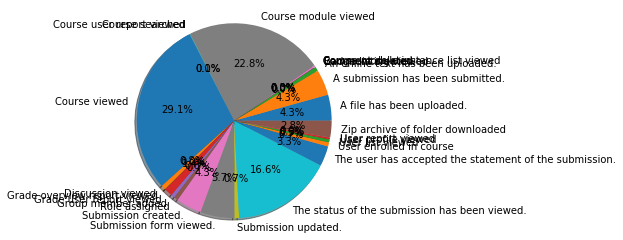

In [60]:
labels = m5ml_subset['Event name'].astype('category').cat.categories.tolist()
counts = m5ml_subset['Event name'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [111]:
m5mg.head(2)

First name Surname ID number  Course total (Real)  \
0       a8NM    bDqB  U8NMDqBG                82.78   
1       aSnR    bGk9  VSnRGk9O                10.14   

   Assignment: Assignment 1 T (Real)  \
0                                 50   
1                                  0   

   Assignment: Assignment 2 - Submit (Real)  Assignment: FG (Real)  \
0                                     61.43                    100   
1                                     58.57                      0   

   Assignment: Pre-submission meeting (Real)  \
0                                         10   
1                                          0   

   Assignment 1 Non-Linear S total (Real)  Assignment 2 V total (Real)  \
0                                    17.5                         21.5   
1                                     0.0                         20.5   

   Attendance: Attendance (Real)  MCQ Test total (Real)  \
0                           0.83                    0.0   
1                           0.68                   20.5   

   Quiz: MCQ 2018 (Real)  engaged  
0                   0.00        1  
1                  68.33        0

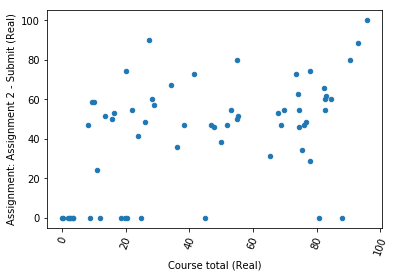

In [61]:
m5mg.plot(kind='scatter', x='Course total (Real)', y='Assignment: Assignment 2 - Submit (Real)', rot=70)

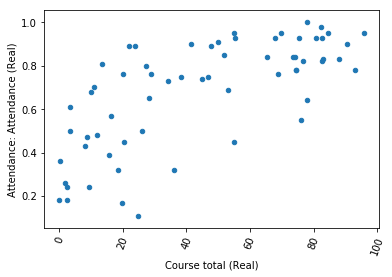

In [62]:
m5mg.plot(kind='scatter', x='Course total (Real)', y='Attendance: Attendance (Real)', rot=70)

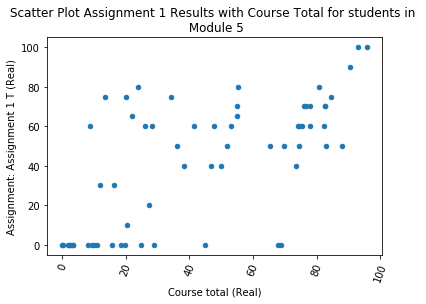

In [112]:
m5mg.plot(kind='scatter', x='Course total (Real)', y='Assignment: Assignment 1 T (Real)', rot=70)
plt.title('Scatter Plot Assignment 1 Results with Course Total for students in \n Module 5')


In [64]:
m5mg.describe().transpose()
# Generates descriptive statistics
# 63 Students
# 8 assigment

count       mean        std   min  \
Course total (Real)                         63.0  44.469365  30.272408  0.03   
Assignment: Assignment 1 T (Real)           63.0  41.904762  31.831570  0.00   
Assignment: Assignment 2 - Submit (Real)    63.0  41.746190  28.106373  0.00   
Assignment: FG (Real)                       63.0  63.492063  48.531956  0.00   
Assignment: Pre-submission meeting (Real)   63.0   5.079365   5.039526  0.00   
Assignment 1 Non-Linear S total (Real)      63.0  14.666667  11.141049  0.00   
Assignment 2 V total (Real)                 63.0  14.611111   9.837160  0.00   
Attendance: Attendance (Real)               63.0   0.679683   0.247998  0.11   
MCQ Test total (Real)                       63.0  12.563492   7.233152  0.00   
Quiz: MCQ 2018 (Real)                       63.0  41.878413  24.110583  0.00   
engaged                                     63.0   0.380952   0.489522  0.00   

                                              25%     50%      75%     max  
Course total (Real)                        17.355   45.01   74.540   95.71  
Assignment: Assignment 1 T (Real)           0.000   50.00   67.500  100.00  
Assignment: Assignment 2 - Submit (Real)   12.145   48.57   59.285  100.00  
Assignment: FG (Real)                       0.000  100.00  100.000  100.00  
Assignment: Pre-submission meeting (Real)   0.000   10.00   10.000   10.00  
Assignment 1 Non-Linear S total (Real)      0.000   17.50   23.625   35.00  
Assignment 2 V total (Real)                 4.250   17.00   20.750   35.00  
Attendance: Attendance (Real)               0.490    0.76    0.890    1.00  
MCQ Test total (Real)                      10.500   15.00   17.750   21.00  
Quiz: MCQ 2018 (Real)                      35.000   50.00   59.165   70.00  
engaged                                     0.000    0.00    1.000    1.00

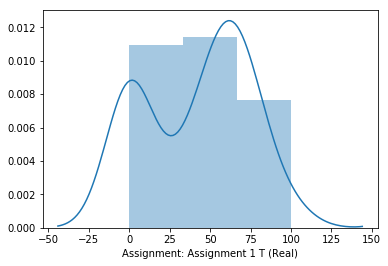

In [65]:
# Visualize the distribution of Assignment: Assignment 1 T (Real) in Module 5'

sns.distplot(m5mg['Assignment: Assignment 1 T (Real)'])

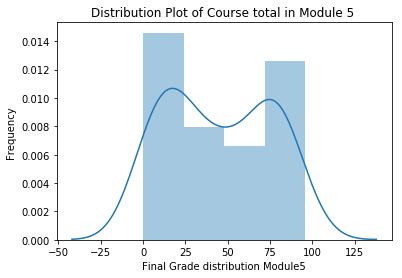

In [96]:
sns.distplot(m5mg['Course total (Real)'])
plt.title('Distribution Plot of Course total in Module 5 ')
plt.xlabel('Final Grade distribution Module5')
plt.ylabel('Frequency ')

In [105]:
m5mg.head(2)

First name Surname ID number  Course total (Real)  \
0       a8NM    bDqB  U8NMDqBG                82.78   
1       aSnR    bGk9  VSnRGk9O                10.14   

   Assignment: Assignment 1 T (Real)  \
0                                 50   
1                                  0   

   Assignment: Assignment 2 - Submit (Real)  Assignment: FG (Real)  \
0                                     61.43                    100   
1                                     58.57                      0   

   Assignment: Pre-submission meeting (Real)  \
0                                         10   
1                                          0   

   Assignment 1 Non-Linear S total (Real)  Assignment 2 V total (Real)  \
0                                    17.5                         21.5   
1                                     0.0                         20.5   

   Attendance: Attendance (Real)  MCQ Test total (Real)  \
0                           0.83                    0.0   
1                           0.68                   20.5   

   Quiz: MCQ 2018 (Real)  engaged  
0                   0.00        1  
1                  68.33        0

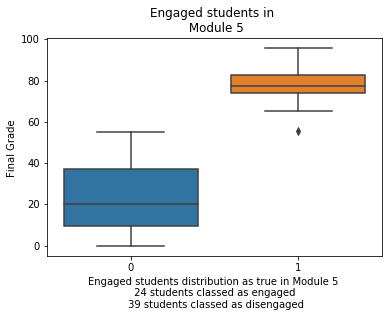

In [110]:
sns.boxplot(x = 'engaged', y = 'Course total (Real)', data = m5mg)
plt.title('Engaged students in \n Module 5')
plt.xlabel('Engaged students distribution as true in Module 5 \n 24 students classed as engaged \n 39 students classed as disengaged')
plt.ylabel('Final Grade ')

In [108]:
engaged5.sum()

24

In [113]:
chi = stats.chisquare(engaged5)
print(chi)

Power_divergenceResult(statistic=39.0, pvalue=0.99020556038239937)


In [114]:
# Is the result significant?
alpha = 0.05
if chi[1] < alpha:
    print("Proportions of engagement differ significantly")
else:
    print("No significant difference in proportions of engagement found")

No significant difference in proportions of engagement found


In [ ]:
#MissingValues

In [115]:
merge_subset5_nullity = merge_subset5.isnull()

In [116]:
merge_subset5_nullity.mean() * 100


# Calculate percentage of missing values
missing_values_percent = merge_subset5_nullity.mean() * 100
print('Percentage of Missing Values:\n', missing_values_percent)

# 0 percent of missing values

Percentage of Missing Values:
 Time                                                                 0.0
User full name                                                       0.0
Date                                                                 0.0
First name                                                           0.0
Last name                                                            0.0
Event name_A file has been uploaded.                                 0.0
Event name_A submission has been submitted.                          0.0
Event name_An online text has been uploaded.                         0.0
Event name_Badge listing viewed                                      0.0
Event name_Comment created                                           0.0
Event name_Comment deleted                                           0.0
Event name_Course module instance list viewed                        0.0
Event name_Course module viewed                                      0.0
Event name_Course se

In [117]:
# Perform Shapiro-Wilk test on Engagement and print result
shapirodis = stats.shapiro(merge_subset5.engaged)
print(shapirodis)

(0.6326379776000977, 0.0)


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [118]:
# Perform Shapiro-Wilk test on Engagement and print result
shapirodis = stats.shapiro(merge_subset5_tri.engaged)
print(shapirodis)

(0.6256009340286255, 0.0)


In [57]:
Powerfeatselect5 = merge_subset5[['Event context_Assignment: v upload','Component_Forum','Event context_Forum: News forum','Event context_Assignment: Assignment 1    T','Event name_User list viewed','Event name_Course module viewed','Event name_Discussion viewed','Event name_Grade user report viewed','Component_User report','Component_File submissions','engaged']]

In [59]:
Powerfeatselect5.groupby(['engaged']).mean()

Event context_Assignment: v upload  Component_Forum  \
engaged                                                        
0                                  0.034531         0.013050   
1                                  0.062949         0.004957   

         Event context_Forum: News forum  \
engaged                                    
0                               0.012046   
1                               0.004957   

         Event context_Assignment: Assignment 1    T  \
engaged                                                
0                                           0.014254   
1                                           0.006691   

         Event name_User list viewed  Event name_Course module viewed  \
engaged                                                                 
0                           0.007227                         0.242522   
1                           0.002478                         0.211152   

         Event name_Discussion viewed  Event name_Grade user report viewed  \
engaged                                                                      
0                            0.010038                             0.010640   
1                            0.004709                             0.017596   

         Component_User report  Component_File submissions  
engaged                                                     
0                     0.010640                    0.078298  
1                     0.017596                    0.095663

In [60]:
spear4 = Powerfeatselect5['Event context_Assignment: v upload']

In [61]:
spear5 = Powerfeatselect5['engaged']

In [62]:
spearcorr = stats.spearmanr(spear4,spear5)
print(spearcorr)
# Would suggest a weak link 

SpearmanrResult(correlation=0.066599627605477815, pvalue=2.4522375897937814e-10)


In [64]:
from scipy.stats import mannwhitneyu
mannwhitneyu(Powerfeatselect5.engaged, m5mg.engaged)

MannwhitneyuResult(statistic=265093.5, pvalue=0.14475433523970138)

In [65]:
# Perform Wilcoxon Signed-Rank test
wilcsr = stats.wilcoxon(Powerfeatselect5.engaged,m5mg.engaged)
print(wilcsr)
#Look at the p-values from the Wilcoxon test. Note that they are actually (more significant)

ValueError: Unequal N in wilcoxon.  Aborting.

In [31]:
final5 = m5mg['Course total (Real)']

In [32]:
final5.head(2)

0    82.78
1    10.14
Name: Course total (Real), dtype: float64

In [33]:
mean_grades, sims = [], 1000


In [34]:
for i in range(sims):
    temp_sample = np.random.choice(final5, replace=True, size=len(final5))
    sample_mean = np.mean(temp_sample)
    mean_grades.append(sample_mean)

In [35]:
# Calculate bootstrapped mean and 95% confidence interval.
boot_mean = np.mean(mean_grades)
boot_95_ci = np.percentile(mean_grades, [2.5, 97.5])
print("Bootstrapped Mean Length = {}, 95% CI = {}".format(boot_mean, boot_95_ci))

Bootstrapped Mean Length = 44.64875777777778, 95% CI = [ 37.32274603  52.25829365]
